In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

## Read in Data

In [2]:
data_set = 'small'

In [3]:
# read in data and clean up extra headers
raw_cut_df = pd.read_csv(f'data/{data_set}/cut_iteration.csv', keep_default_na=False)
raw_cut_df = raw_cut_df[raw_cut_df['cut generation iteration'] != 'cut generation iteration']
raw_cut_df = raw_cut_df.astype({'disjunctive terms': 'int64',
                                'cut generation iteration': 'int64',
                                'root gap closed': 'float64'})

raw_restart_df = pd.read_csv(f'data/{data_set}/restart.csv')
raw_restart_df = raw_restart_df[raw_restart_df['restart'] != 'restart']
raw_restart_df = raw_restart_df.astype({'disjunctive terms': 'int64',
                                        'restart': 'int64',
                                        'additional root gap closed': 'float64',
                                        'iterations': 'int64'})

raw_termination_df = pd.read_csv(f'data/{data_set}/termination.csv')
raw_termination_df = raw_termination_df.astype(
    {'default cut generation iterations': 'Int64',
     'default and disjunctive cut generation iterations': 'Int64'}
)

instance_df = pd.read_csv(f'data/{data_set}/instance.csv')

## Summary Statistics

In [4]:
instance_df

,instance
0,gen-ip036
1,control30-3-2-3
2,mik-250-20-75-3
3,ic97_tension
4,markshare1
...,...
83,neos-3610040-iskar
84,prod2
85,aflow30a
86,glass4


In [5]:
raw_termination_df

,instance,disjunctive terms,restart termination mode,restart termination notes,final termination mode,default cut generation iterations,default and disjunctive cut generation iterations
0,mas76,4,restart optimality,NaN,solution,20,3
1,neos-3046601-motu,4,max number restarts,NaN,stopped on nodes,2,2
2,control30-3-2-3,4,max number restarts,NaN,stopped on nodes,14,14
3,neos-5140963-mincio,4,max number restarts,NaN,stopped on nodes,10,10
4,markshare1,4,max number restarts,NaN,stopped on nodes,10,10
...,...,...,...,...,...,...,...
346,danoint,32,restart time limit,NaN,stopped on time,10,2
347,supportcase20,32,restart time limit,NaN,stopped on time,20,2
348,mik-250-20-75-5,32,restart time limit,NaN,stopped on time,20,5
349,aflow30a,32,restart time limit,NaN,stopped on time,20,2


### Restart Termination Mode

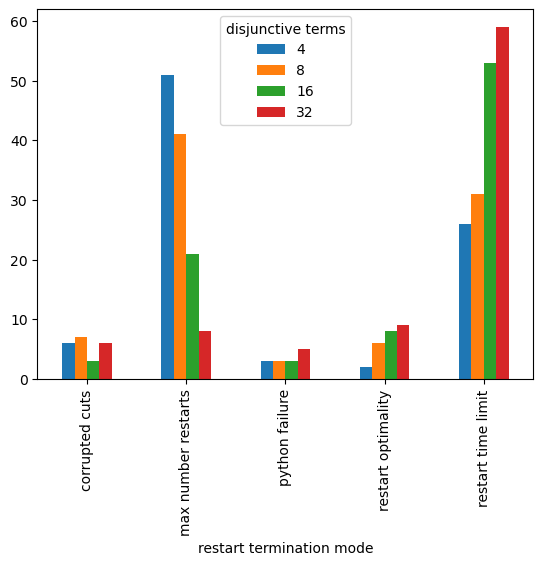

In [6]:
df = raw_termination_df.groupby(['disjunctive terms',
                                 'restart termination mode']).count()['instance'].reset_index()
df.pivot(index='restart termination mode', columns='disjunctive terms')['instance'].plot(kind='bar')
plt.show()

In [7]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 30):
    display(raw_termination_df.pivot(index='instance',
                                     columns='disjunctive terms')['restart termination mode'])

disjunctive terms,4,8,16,32
instance,,,,
22433,corrupted cuts,corrupted cuts,restart optimality,restart optimality
23588,restart time limit,max number restarts,restart time limit,restart time limit
aflow30a,max number restarts,restart time limit,restart time limit,restart time limit
assign1-5-8,restart time limit,restart time limit,restart time limit,restart time limit
b-ball,max number restarts,max number restarts,restart time limit,restart time limit
beavma,max number restarts,max number restarts,max number restarts,restart time limit
bienst1,restart time limit,restart time limit,restart time limit,restart time limit
bienst2,restart time limit,restart time limit,restart time limit,restart time limit
blend2,corrupted cuts,corrupted cuts,restart time limit,corrupted cuts


### Final Termination Mode

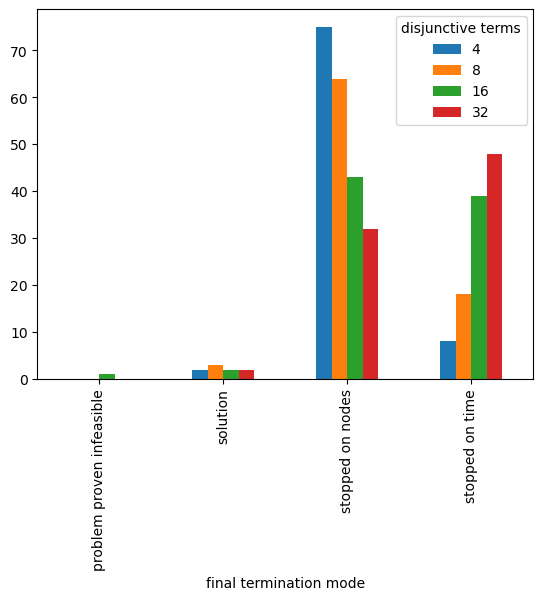

In [8]:
df = raw_termination_df.groupby(['disjunctive terms',
                                 'final termination mode']).count()['instance'].reset_index()
df.pivot(index='final termination mode', columns='disjunctive terms')['instance'].plot(kind='bar')
plt.show()

In [9]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 30):
    display(raw_termination_df.pivot(index='instance',
                                     columns='disjunctive terms')['final termination mode'])

disjunctive terms,4,8,16,32
instance,,,,
22433,stopped on nodes,stopped on nodes,stopped on nodes,stopped on nodes
23588,stopped on nodes,stopped on nodes,stopped on time,stopped on time
aflow30a,stopped on nodes,stopped on nodes,stopped on time,stopped on time
assign1-5-8,stopped on nodes,stopped on nodes,stopped on time,stopped on time
b-ball,stopped on nodes,stopped on nodes,stopped on nodes,stopped on nodes
beavma,stopped on nodes,stopped on nodes,stopped on nodes,stopped on time
bienst1,stopped on time,stopped on time,stopped on time,stopped on time
bienst2,stopped on time,stopped on time,stopped on time,stopped on time
blend2,stopped on nodes,stopped on nodes,stopped on nodes,stopped on nodes


### Number of Restarts (CGLPs Generated)

array([[<AxesSubplot: title={'center': '4'}>],
       [<AxesSubplot: title={'center': '8'}>],
       [<AxesSubplot: title={'center': '16'}>],
       [<AxesSubplot: title={'center': '32'}>]], dtype=object)

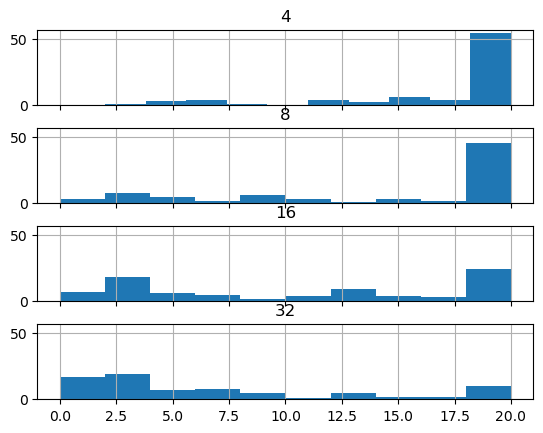

In [10]:
df = raw_restart_df.groupby(['instance', 'disjunctive terms']).max()['restart'].reset_index()
df = df.pivot(index='instance', columns='disjunctive terms')['restart']
df.hist(sharex=True, sharey=True, layout=(len(df.columns), 1))

In [11]:
df

disjunctive terms,4,8,16,32
instance,,,,
22433,NaN,NaN,0.0,0.0
23588,9.0,20.0,3.0,3.0
aflow30a,20.0,14.0,13.0,8.0
assign1-5-8,7.0,3.0,3.0,2.0
b-ball,20.0,20.0,14.0,7.0
...,...,...,...,...
supportcase16,20.0,NaN,0.0,0.0
supportcase20,4.0,2.0,2.0,1.0
supportcase26,20.0,20.0,20.0,20.0


## Root Cut Generation Iterations for Default vs. Both

In [12]:
# remove failed runs
tdf = raw_termination_df[~pd.isna(raw_termination_df['default cut generation iterations'])]
tdf.columns = list(tdf.columns[:-2]) + ['default', 'default and disjunctive']
tdf

,instance,disjunctive terms,restart termination mode,restart termination notes,final termination mode,default,default and disjunctive
0,mas76,4,restart optimality,NaN,solution,20,3
1,neos-3046601-motu,4,max number restarts,NaN,stopped on nodes,2,2
2,control30-3-2-3,4,max number restarts,NaN,stopped on nodes,14,14
3,neos-5140963-mincio,4,max number restarts,NaN,stopped on nodes,10,10
4,markshare1,4,max number restarts,NaN,stopped on nodes,10,10
...,...,...,...,...,...,...,...
346,danoint,32,restart time limit,NaN,stopped on time,10,2
347,supportcase20,32,restart time limit,NaN,stopped on time,20,2
348,mik-250-20-75-5,32,restart time limit,NaN,stopped on time,20,5
349,aflow30a,32,restart time limit,NaN,stopped on time,20,2


In [13]:
tdf = pd.melt(tdf, id_vars=['instance', 'disjunctive terms'],
              value_vars=['default', 'default and disjunctive'],
              var_name='cuts', value_name='cut generation iteration')
tdf

,instance,disjunctive terms,cuts,cut generation iteration
0,mas76,4,default,20
1,neos-3046601-motu,4,default,2
2,control30-3-2-3,4,default,14
3,neos-5140963-mincio,4,default,10
4,markshare1,4,default,10
...,...,...,...,...
625,danoint,32,default and disjunctive,2
626,supportcase20,32,default and disjunctive,2
627,mik-250-20-75-5,32,default and disjunctive,5
628,aflow30a,32,default and disjunctive,2


In [14]:
m = pd.merge(tdf, raw_cut_df,
             on=['instance', 'cuts', 'disjunctive terms', 'cut generation iteration'],
             how='inner')
m.loc[m['cuts'] == 'default and disjunctive', 'cuts'] = 'both'
m

,instance,disjunctive terms,cuts,cut generation iteration,root gap closed,additional root gap closed
0,mas76,4,default,20,7.851385e-02,6.350741e-04
1,neos-3046601-motu,4,default,2,4.417189e-15,0.000000e+00
2,control30-3-2-3,4,default,14,1.619840e-02,4.953100e-05
3,neos-5140963-mincio,4,default,10,2.286057e-01,-3.330669e-16
4,markshare1,4,default,10,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
625,danoint,32,both,2,4.276465e-03,4.276465e-03
626,supportcase20,32,both,2,3.910113e-01,3.817873e-01
627,mik-250-20-75-5,32,both,5,7.915543e-01,2.237948e-02
628,aflow30a,32,both,2,2.174643e-01,2.174643e-01


array([[<AxesSubplot: title={'center': "(4, 'default')"}>,
        <AxesSubplot: title={'center': "(8, 'default')"}>,
        <AxesSubplot: title={'center': "(16, 'default')"}>,
        <AxesSubplot: title={'center': "(32, 'default')"}>],
       [<AxesSubplot: title={'center': "(4, 'both')"}>,
        <AxesSubplot: title={'center': "(8, 'both')"}>,
        <AxesSubplot: title={'center': "(16, 'both')"}>,
        <AxesSubplot: title={'center': "(32, 'both')"}>]], dtype=object)

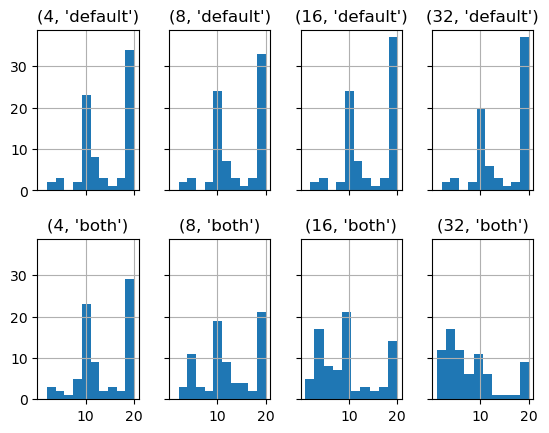

In [15]:
h = m.pivot(index='instance',
            columns=['disjunctive terms', 'cuts'])['cut generation iteration']
h.astype('Int64').hist(sharex=True, sharey=True, layout=(2, 4))

## Remove Bad Runs from Restart and Cut Iteration Data

First, keep only the runs where both the restarted and final runs terminated properly

In [16]:
restart_modes = ['max number restarts', 'restart optimality', 'restart time limit']
final_modes = ['solution', 'stopped on nodes']
good_runs = raw_termination_df.loc[
    raw_termination_df['restart termination mode'].isin(restart_modes) &
    raw_termination_df['final termination mode'].isin(final_modes),
    ['instance', 'disjunctive terms']
]
good_runs

,instance,disjunctive terms
0,mas76,4
1,neos-3046601-motu,4
2,control30-3-2-3,4
3,neos-5140963-mincio,4
4,markshare1,4
...,...,...
321,mas74,32
322,neos-2624317-amur,32
323,22433,32
324,neos-1425699,32


In [18]:
# remove unreasonable runs from raw_cut_df
raw_cut_df = pd.merge(raw_cut_df, good_runs, on=['instance', 'disjunctive terms'],
                      how='inner')

In [19]:
# remove unreasonable runs from raw_restart_df
raw_restart_df = pd.merge(raw_restart_df, good_runs, on=['instance', 'disjunctive terms'],
                          how='inner')

Now get rid of runs that terminated properly but then ended up with unreasonable root gap closures

In [20]:
raw_cut_df.loc[raw_cut_df['root gap closed'] > 1.01]

,instance,cuts,disjunctive terms,cut generation iteration,root gap closed,additional root gap closed
54,mas76,disjunctive only,4,5,1.476027,1.000780
55,mas76,disjunctive only,4,6,1.781653,0.305625
56,mas76,disjunctive only,4,7,4.148787,2.367134
57,mas76,disjunctive only,4,8,4.148787,0.000000
58,mas76,disjunctive only,4,9,4.148787,0.000000
...,...,...,...,...,...,...
29845,mas74,default and disjunctive,32,46,2.739035,0.000000
29846,mas74,default and disjunctive,32,47,2.739035,0.000000
29847,mas74,default and disjunctive,32,48,2.739035,0.000000
29848,mas74,default and disjunctive,32,49,2.739035,0.000000


In [21]:
# check to make sure no mistakes made in generating cuts via unreasonable root gaps
bad_runs = raw_cut_df.loc[raw_cut_df['root gap closed'] > 1.01, ['instance', 'disjunctive terms']].drop_duplicates()
bad_runs

,instance,disjunctive terms
54,mas76,4
3206,mas74,4
7553,mas76,8
14056,mas74,8
17511,gt2,8
19110,mas76,16
23312,mas74,16
24852,neos-1425699,16
26910,mas76,32
29757,mas74,32


In [22]:
# remove unreasonable runs from raw_cut_df
merge = pd.merge(raw_cut_df, bad_runs, on=['instance', 'disjunctive terms'],
                 indicator=True, how='outer')
raw_cut_df = merge[merge['_merge'] == 'left_only'].drop('_merge', axis=1)

In [23]:
# remove unreasonable runs from raw_restart_df
merge = pd.merge(raw_restart_df, bad_runs, on=['instance', 'disjunctive terms'],
                 indicator=True, how='outer')
raw_restart_df = merge[merge['_merge'] == 'left_only'].drop('_merge', axis=1)

## Plot Gap Closed at Each Cut Generation Iteration

In [24]:
# group dual bound progress at root by cuts applied and disjunctive terms
cut_df = dict(tuple(raw_cut_df.groupby(['cuts', 'disjunctive terms'])))
cuts = list({k[0] for k in cut_df})
disjunctive_term_list = list({k[1] for k in cut_df})

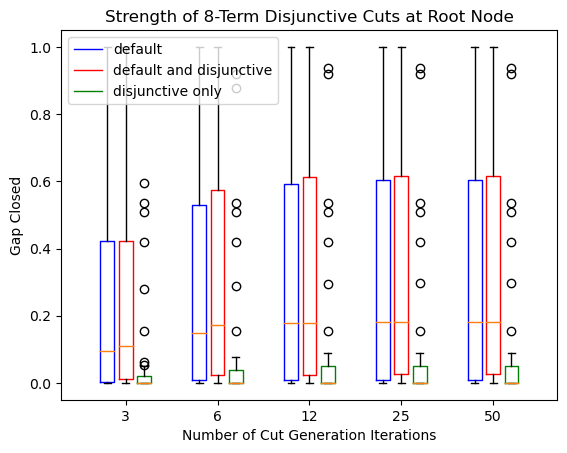

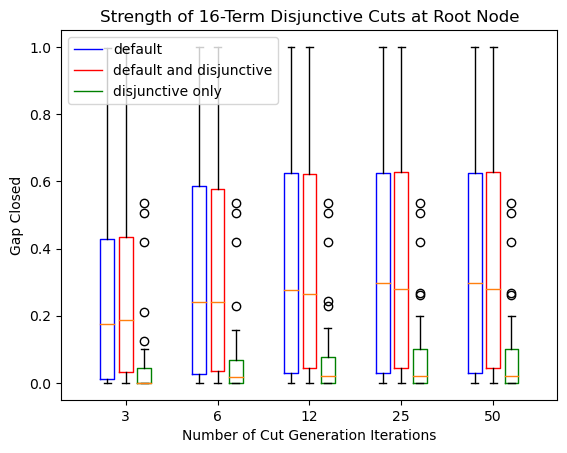

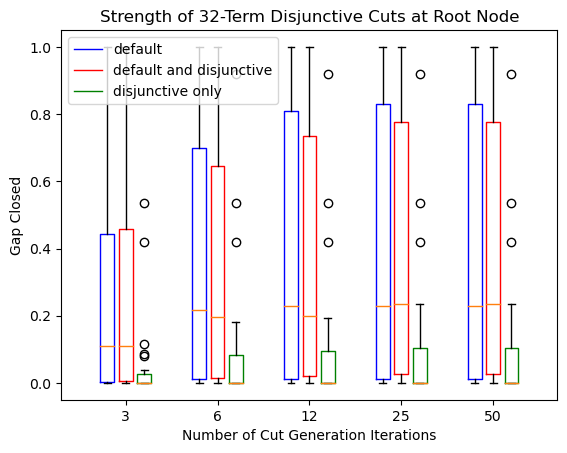

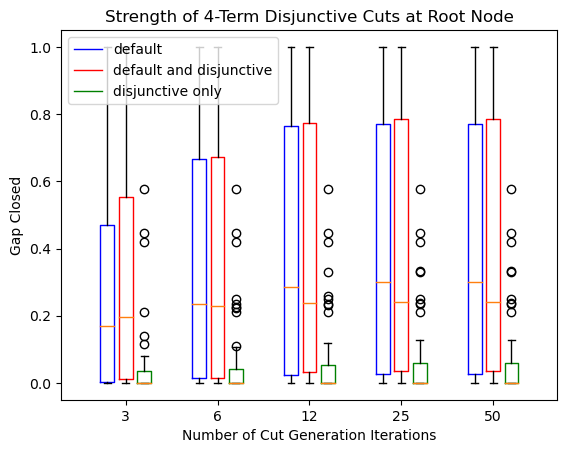

In [31]:
# which cut generation iterations to plot
iterations = [3, 6, 12, 25, 50]

# parameters for generating box plots
shift = .2
colors = ['b', 'r', 'g']  # must have same length as cuts
bp = {}

# make one plot for each number of disjunctive terms used
for disjunctive_terms in disjunctive_term_list:
    fig, ax = plt.subplots()
    
    # make a collection of box plots for each set of cuts used, plotting selected iterations
    for i, cut in enumerate(cuts):
        
        # get the dual bound progress for this combo of disjunctive term and type of cuts
        df = cut_df[cut, disjunctive_terms]
        
        # filter down to iterations of interest
        df = df[df['cut generation iteration'].isin(iterations)]
        
        # make one box plot for each cut generation iteration of interest
        gb = dict(tuple(df.groupby(['cut generation iteration'])['root gap closed']))
        bp[cut] = ax.boxplot(gb.values(), positions=np.arange(len(iterations))+(i - 1)*shift,
                             boxprops=dict(color=colors[i]), widths=.15)

    # set plot attributes
    ax.legend([b["boxes"][0] for b in bp.values()], bp.keys(), loc='upper left')
    ax.set_xticks(np.arange(len(iterations)))
    ax.set_xticklabels(iterations)
    ax.set(
        title=f'Strength of {disjunctive_terms}-Term Disjunctive Cuts at Root Node',
        xlabel='Number of Cut Generation Iterations',
        ylabel='Gap Closed',
        ylim=(-.05,1.05)
    )

    plt.show()

## Plot Gap Closed By Disjunctive Cuts after Each Restart

In [26]:
raw_restart_df

,instance,disjunctive terms,restart,root gap closed,additional root gap closed,iterations
5,neos-3046601-motu,4,0,4.417189e-15,-0.145212,1
6,neos-3046601-motu,4,1,4.417189e-15,0.000000,1
7,neos-3046601-motu,4,2,4.417189e-15,0.000000,1
8,neos-3046601-motu,4,3,4.417189e-15,0.000000,1
9,neos-3046601-motu,4,4,4.417189e-15,0.000000,1
...,...,...,...,...,...,...
3217,neos-1425699,32,16,0.000000e+00,0.000000,1
3218,neos-1425699,32,17,0.000000e+00,0.000000,2
3219,neos-1425699,32,18,0.000000e+00,0.000000,1
3220,neos-1425699,32,19,9.205734e-01,0.920573,4


In [27]:
# filter out restarts that occur less than a certain number of times
min_restarts = 10
count = raw_restart_df['restart'].value_counts()
raw_restart_df = raw_restart_df[raw_restart_df['restart'].isin(count.index[count.gt(min_restarts)])]

In [28]:
# group dataframe by number of disjunctive terms
restart_df = dict(tuple(raw_restart_df.groupby('disjunctive terms')[['restart', 'additional root gap closed']]))

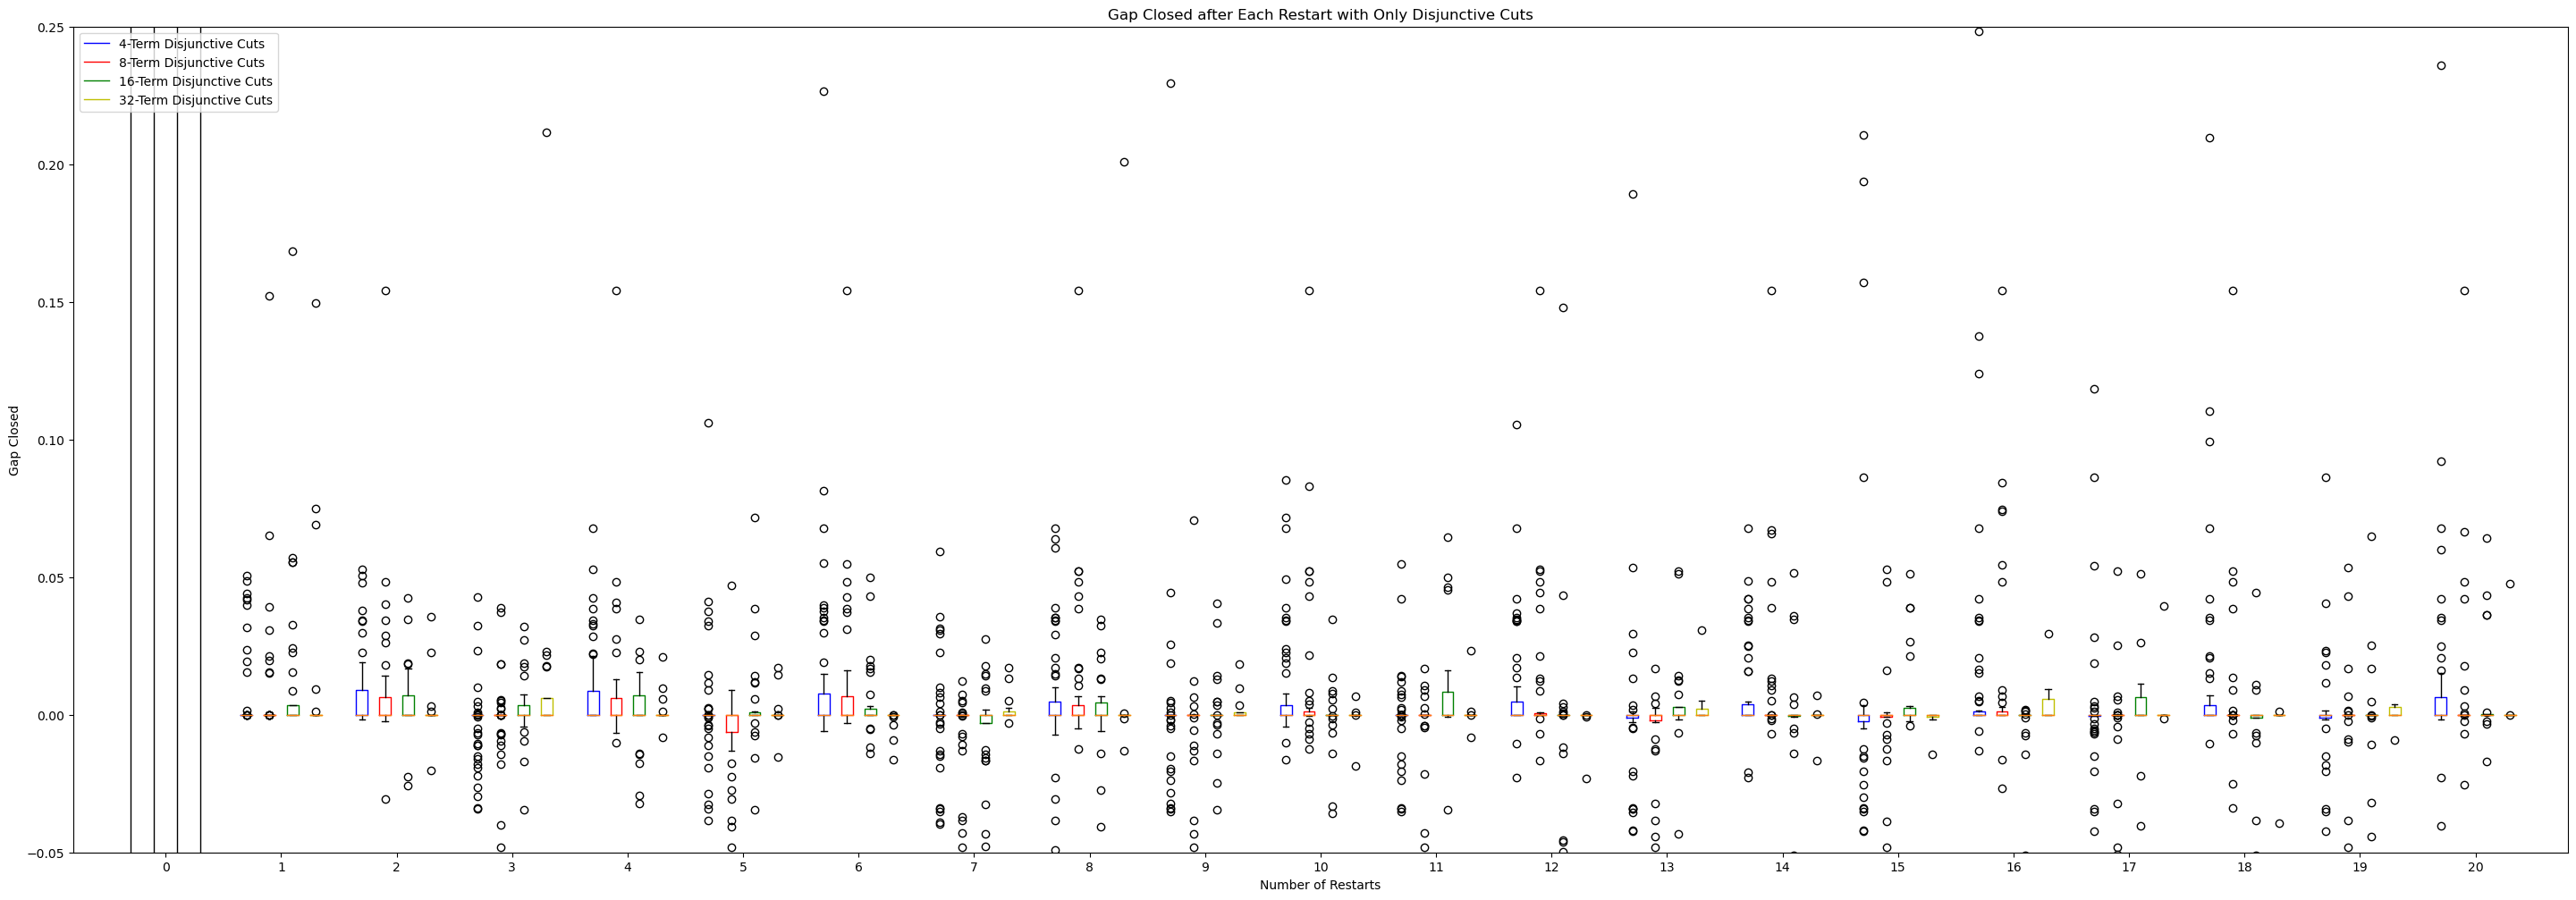

In [29]:
# make one plot for each number of disjunctive terms used
fig, ax = plt.subplots()

# parameters for generating box plots
shift = .2
colors = ['b', 'r', 'g', 'y']
assert len(colors) == len(restart_df), "colors must have same length as disjunctive term list"
bp = {}
ticks = np.sort(raw_restart_df['restart'].unique())

# for each number of disjunctive terms plot progress of each subsequent restart as box plot
for i, (disjunctive_terms, df) in enumerate(restart_df.items()):
    
    # for each number of disjunctive terms group data frame by restart
    gb = dict(tuple(df.groupby(['restart'])['additional root gap closed']))
    
    # plot each restart as a boxplot
    bp[disjunctive_terms] = ax.boxplot(gb.values(), positions=np.arange(len(gb))+(i - 1.5)*shift,
                                       boxprops=dict(color=colors[i]), widths=.1)

# set plot attributes
ax.legend([b["boxes"][0] for b in bp.values()], [f'{x}-Term Disjunctive Cuts' for x in bp],
          loc='upper left')
ax.set_xticks(np.arange(len(ticks)))
ax.set_xticklabels(ticks)
ax.set(
    title=f'Gap Closed after Each Restart with Only Disjunctive Cuts',
    xlabel='Number of Restarts',
    ylabel='Gap Closed',
    ylim=(-.05,.25),
)
fig.set_size_inches(36, 12)

plt.show()